# Hypothesentest: $t$-Test

In diesem Jupyter Notebook wenden wir uns noch einmal der ersten Hypothese zu und prüfen diese nun einmal mit einem klassischen $t$-Test.

Auch bei diesem Test halten wir uns an den üblichen Ablauf:

1.   Formulierung der Nullhypothese und der Alternativhypothese
2.   Teststatistik wählen
3.   Signifikanzniveau festlegen
4.   Nullverteilung der Teststatistik bestimmen
5.   Annahme und Ablehnungsbereich für die Nullhypothese bestimmen
6.   Teststatistik berechnen
7.   Das Ergebnis der Studie gemäß den Vorgaben aus 3. + 5. ermitteln.

---

**Bitte beachten** Sie, dass die enthaltenen Codezeilen ausgeführt werden müssen. Wir empfehlen Ihnen, alle Codezeilen vor der Ausführung auszuführen. Wählen Sie dazu im Menü "Cell" den Punkt "Run all".

## Einlesen der Daten

Um unsere Hypothesen im Folgenden zu überprüfen starten wir zunächst, wie gehabt, mit dem Einlesen unserer Daten.

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

daten = pd.read_csv("UmweltLuftDaten.CSV", sep=';', header=0)

daten

,Stationscode,Datum,Uhrzeit,Feinstaub,Ozon,Stickstoffdioxid,Luftqualitätsindex,Temperatur-mean,Temperatur-min,Temperatur-max,Niederschlag,Schneefall,Windrichtung,Windgeschwindigkeit,Spitzenwindboe,Luftdruck,Sonnenminuten
0,DENW053,01.11.2020,01:00,13.0,45.0,9.0,sehr gut,15.5,12.8,18.2,2.3,0.0,214.4,30.5,63.0,1012.0,0.0
1,DENW053,01.11.2020,02:00,13.0,33.0,13.0,sehr gut,15.5,12.8,18.2,2.3,0.0,214.4,30.5,63.0,1012.0,0.0
2,DENW053,01.11.2020,03:00,13.0,28.0,13.0,sehr gut,15.5,12.8,18.2,2.3,0.0,214.4,30.5,63.0,1012.0,0.0
3,DENW053,01.11.2020,04:00,13.0,41.0,7.0,sehr gut,15.5,12.8,18.2,2.3,0.0,214.4,30.5,63.0,1012.0,0.0
4,DENW053,01.11.2020,05:00,13.0,46.0,7.0,sehr gut,15.5,12.8,18.2,2.3,0.0,214.4,30.5,63.0,1012.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35039,DENW059,31.10.2021,21:00,6.0,51.0,9.0,sehr gut,13.0,9.0,17.9,11.6,0.0,172.1,17.0,78.0,1003.9,71.0
35040,DENW059,31.10.2021,22:00,6.0,59.0,7.0,sehr gut,13.0,9.0,17.9,11.6,0.0,172.1,17.0,78.0,1003.9,71.0
35041,DENW059,31.10.2021,23:00,6.0,45.0,NaN,sehr gut,13.0,9.0,17.9,11.6,0.0,172.1,17.0,78.0,1003.9,71.0
35042,DENW059,01.11.2021,24:00,6.0,39.0,9.0,sehr gut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Formulierung der Nullhypothese und der Alternativhypothese

**Hypothese 2**: "*Es gibt einen Unterschied zwischen der Feinstaubbelastung
der Luft am Tag und in der Nacht (Vermutung: tagsüber höher).*"

**Nullhypothese 2**: "*Es gibt keinen Unterschied zwischen der Feinstaubbelastung
der Luft am Tag und in der Nacht*"

Für diese Hypothese muss geprüft werden ob zwei unabhängige Verteilungen, die der Werte am Tag und die der Werte in der Nacht, sich signifikant voneinander unterscheiden. Dies kann man beispielsweise mit einem t-Test überprüfen.



## Teststatistik wählen

Eine Teststatistik ist eine Kennzahl, die aus den Stichprobendaten berechnet wird, um in einem statistischen Hypothesentest eine Entscheidung zu treffen. Sie fasst die Information der Daten in einer Zahl zusammen, anhand derer die Hypothese bewertet wird.

Zuvor haben wir die hier untersuchte Hypothese bereits anhand eines Vorzeichentests überprüft. Hier werden wir die Hypothese nun mithilfe eines t-Tests überprüfen.

Ein $t$-Test untersucht, ob sich die Mittelwerte zweier Gruppen signifikant voneinander unterscheiden. Dabei prüft er, ob ein gefundener Unterschied im Mittelwert auf Zufall basiert oder ob er wahrscheinlich "echt" ist.

Im Allgemeinen wird die $t$-Teststatistik als Verhältnis zwischen Mittelwertsdifferenz und Standardfehler berechnet. Die Teststatistik ist dann der so berechnete $t$-Wert.

Im Detail wird der t-Test hier anschaulich erklärt: https://datatab.de/tutorial/t-test

## Signifikanzniveau (Irrtumswahrscheinlichkeit) festlegen

Mit einem Hypothesentest kann die Nullhypothese nie mit 100%iger Sicherheit verworfen oder bestätigt werden. Es besteht immer eine Irrtumswahrscheinlichkeit. Das liegt daran, dass für die Analyse immer eine Stichprobe aus der Grundgesamtheit gezogen wird.

Wie auch bei unseren vorangegangenen Untersuchungen legen wir auch hier das Signifikanzniveau auf $α=0,05$.




## Nullverteilung der Teststatistik bestimmen

Da alle statistischen Tests auf Wahrscheinlichkeiten und Stichproben beruhen verwenden alle diese Tests auch eine Nullverteilung, um die Wahrscheinlichkeit des Auftretens einer bestimmten Teststatistik ermitteln zu können.
Beim $t$-Test beschreibt die Nullverteilung die Verteilung des $t$-Wertes unter der Annahme, dass es keinen Unterschied in den beiden betrachteten Verteilungen gibt.

Allerdings werden uns in dem Test, den wir im Folgenden durchführen, viele Arbeitsschritte bereits abgenommen, sodass wir nicht mehr anhand der Nullverteilung entscheiden müssen, ob unser $t$ Wert in den Annahme- oder Ablehungsbereich fällt.

## Annahme- und Ablehnungsbereich bestimmen

Die Annahme- und Ablehnungsbereich eines statistischen Tests basieren auf einem festgelegten Signifikanzniveau $α$ (z. B. $α=0,05$). Der Ablehnungsbereich ist der Bereich der Teststatistik, der zur Ablehnung der Nullhypothese führt, wenn die Wahrscheinlichkeit, dass ein Wert dort landet, kleiner oder gleich $α$ ist. Der Annahmebereich umfasst alle anderen Werte. Eine Anschaulicher Erklärung dazu haben wir im Notebook zum Vorzeichentest betracht.

Beim t-Test verwenden wir den $p$-Wert um zu entscheiden in welchen Bereich unsere berechnete Teststatistik fällt. Der p-Wert ist die Wahrscheinlichkeit, unter der Annahme, dass die Nullhypothese wahr ist, einen Testwert zu finden, der genauso extrem oder extremer ist als der beobachtete Wert.

Wenn der $p$-Wert kleiner oder gleich dem Signifikanzniveau $α$ ist, liegt der beobachtete Wert im Ablehnungsbereich und wir lehnen die Nullhypothese ab. Wenn der $p$-Wert größer ist, liegt der Wert im Annahmebereich, und wir behalten die Nullhypothese bei.

## Teststatistik berechnen

Bevor wir den Test jetzt tatsächlich durchführen können müssen wir zunächst unsere Daten entsprechend vorbereiten.


### Vorbereitung der Datensätze


Um diese Hypothese zu untersuchen vergleichen wir zwei Verteilungen, nämlich die der Feinstaubbelastung am Tag und der in der Nacht. Wir müssen uns also zwei Subsets der Daten erstellen, die jeweils die Werte der Feinstaubbelastung am Tag und der in der Nacht enthalten.
Um diese Subsets bilden zu können müssen wir für uns zunächst definieren was Tag ist und was Nacht. Da es hierzu wohl verschiedene Meinungen gibt versuchen wir Kernbereiche zu definieren die eindeutig Tag oder Nacht zuzuordnen sind.
Im Folgenden wählen wir für den Tag den Zeitraum zwischen 7 Uhr und 18 Uhr und für die Nacht den Zeitraum zwischen 20 Uhr und 5 Uhr morgens. Unter dieser Annahme markieren wir unsere Zellen entsprechend als Tag oder Nacht.

In [2]:
# Wir filtern die Datensätze so, dass wir ein Subset für den Tag und eines für die Nacht erhalten
daten_tag = daten.loc[(daten["Uhrzeit"] >= "07:00") & (daten["Uhrzeit"] <= "18:00") ]
daten_nacht = daten.loc[(daten["Uhrzeit"] >= "20:00") | (daten["Uhrzeit"] <= "05:00") ]

# Einmal die gefilterten Uhrzeiten ausgeben lassen um zu schauen ob die Zordnung korrekt funktioniert hat
print(daten_tag['Uhrzeit'].unique())
print(daten_nacht['Uhrzeit'].unique())

['07:00' '08:00' '09:00' '10:00' '11:00' '12:00' '13:00' '14:00' '15:00'
 '16:00' '17:00' '18:00']
['01:00' '02:00' '03:00' '04:00' '05:00' '20:00' '21:00' '22:00' '23:00'
 '24:00']


### Überblick über die Daten verschaffen

Wir können uns an dieser Stelle schon mal einen schnellen Überblick über die Daten verschaffen, indem wir einen Boxplot erstellen.

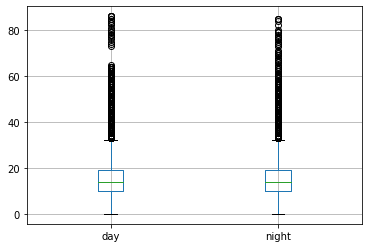

In [3]:
plotdata = [daten_tag['Feinstaub'], daten_nacht['Feinstaub']]
data = pd.DataFrame(plotdata).T
data.columns = ['day', 'night']

import matplotlib.pyplot as plt

boxplot = data.boxplot(column=['day', 'night'])
boxplot.plot()
plt.show()

Am Boxplot können wir bereits ablesen, dass die Verteilungen sehr ähnlich sind. Hier ist kein signifikanter Unterschied zwischen den beiden Verteilungen zu erwarten. Aber um ganz genau zu sein führen wir als nächstes den t-Test durch.

### Vorbedingungen für den t-Test prüfen


Für die Untersuchung verwenden wir einen t-Test. Dieser ermöglicht es uns zu untersuchen ob zwei Verteilungen sich voneinander unterscheiden. Ein t-Test macht allerdings einige Annahmen über die Daten, die zutreffen müssen, damit der Test korrekte Ergebnisse liefert:

1.   **Die Beobachtungen / Werte müssen unabhängig voneinander sein.** Das bedeutet, dass es keinen (bekannten) Zusammenhang zwischen den einzelnen Beobachtungen geben darf. Also der Wert einer Beobachtung keinen Einfluss auf den Wert einer anderen Beobachtung haben soll. Ein Zusammenhang wäre bspw. gegeben, wenn Körpergröße und Gewicht betrachtet wird, oder Alter und Gesundheitszustand.
2.   **Die Werte / Beobachtung müssen normalverteilt sein.** Eine Verteilung gilt als normalverteilt, wenn die Verteilung Symmetrisch ist, ihr Erwartungswert bzw. die Mitte der Verteilung bei null liegt und die Standardabweichung bzw. Varianz eins ist. Die Normalität kann visuell anhand von z.B. Histogrammen beurteilt werden (vgl. Modul 4.1 Schiefe, Wölbung und Exzess). Der t-Test ist in Bezug auf die Normalverteilung relativ robust wenn eine ausreichend große Menge an Daten vorliegt.
3.   **Die Varianzen beider Verteilungen müssen (ungefähr) gleich sein.**
Die Varianzen der Verteilungen können zum (wie in Modul 4.1 Streuungswerte) berechnet werden oder z.B. mithilfe von Boxplots visuell verglichen werden.

Wenn diese Annahmen von den zu testenden Daten nicht erfüllt werden, dann würde der t-Test keine validen Ergebnisse liefern. In diesem Fall sollte ein anderer Test gewählt werden. Um also den t-Test durchführen zu können und dabei sicher zu sein, dass wir sinnvolle Ergebnisse erhalten müssen wir zunächst kurz prüfen ob diese Prämissen erfüllt sind.

#### Unabhängigkeit der Werte

An dieser Stelle stehen wir vor der Frage ob die Feinstaubwerte des Tages Einfluss nehmen auf die der Nacht bzw. ob die Werte der Nacht Einfluss nehmen auf die Werte des Tages.

Das Umweltbundesamt schreibt dazu auf seiner [Seite](https://www.umweltbundesamt.de/daten/luft/feinstaub-belastung#witterungsabhangigkeit):

Wie sehr sich die Feinstaubbelastung ändert "hängt entscheidend davon ab, wie schnell ein Austausch mit der Umgebungsluft erfolgen kann. Winterliche Hochdruckwetterlagen mit geringen Windgeschwindigkeiten führen dazu, dass die Schadstoffe nicht abtransportiert werden können. Sie sammeln sich in den unteren Luftschichten (bis etwa 1.000 Meter) wie unter einer Glocke. Der Wechsel zu einer Wettersituation mit stärkerem Wind führt zu einer raschen Abnahme der PM10-Belastung."

Dies bedeutet, dass die Daten nicht sicher unabhängig voneinander sind, sondern dies auch von der Wetterlage abhängt.
Für die weitere Untersuchung nehmen wir eine günstige Wetterlage an, behalten diese Schwachstelle bei der Voruntersuchung aber im Hinterkopf.

#### Normalverteilung der Daten

Ob die Werte eines Datensatzes normalverteilt sind lässt sich auch mit statistischen Tests überprüfen. Wer sich dazu einlesen möchtet findet z.B. hier eine einfache Einführung: [Linktext](https://datatab.de/tutorial/test-auf-normalverteilung).


Aber wir konzentrieren uns der einfachheit halber auf die visuelle Überprüfung. Mit Hilfe eines Histgramms können wir uns einen Eindruck über die Verteilung der Daten verschaffen. In "Modul 4.1: Daten auswerten" Abschnitt "Schiefe, Wölbung, Exzess" haben wir Verteilungen untersucht und gesagt, dass die Schiefe einer Verteilung durch die Position von arithmetischem Mittel, Modalwert und Medianwert beschrieben werden kann. Man sagt die Verteilung ist symmetrisch (bzw. Normalverteilt), wenn gilt Modus, Median und Mean der Verteilung in etwa übereinstimmen.

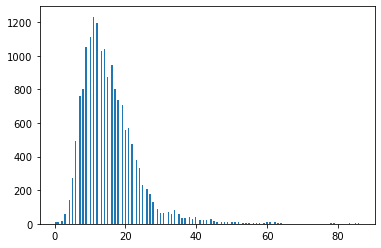

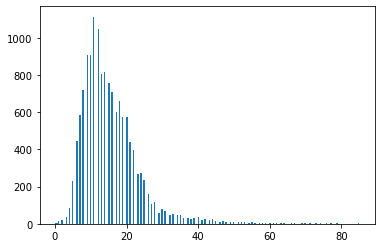

In [4]:
plt.hist(daten_tag['Feinstaub'], bins=200)
plt.show()

plt.hist(daten_nacht['Feinstaub'], bins=200)
plt.show()

In [5]:
print("Mean: " + str(daten_tag['Feinstaub'].mean()))
print("Median: " + str(daten_tag['Feinstaub'].median()))
print("Modus: " + str(daten_tag['Feinstaub'].mode()[0]))

print("Mean: " + str(daten_nacht['Feinstaub'].mean()))
print("Median: " + str(daten_nacht['Feinstaub'].median()))
print("Modus: " + str(daten_nacht['Feinstaub'].mode()[0]))

Mean: 15.527758212574334
Median: 14.0
Modus: 11.0
Mean: 15.515781076581575
Median: 14.0
Modus: 11.0


Die Histogramme unserer Datensätze zeigen, dass die Verteilungen der Werte leicht rechtsschief sind. Da die Schiefe aber nur leicht ausgeprägt ist und wir eine wirklich große Stichprobe zur Verfügung haben können wir die leicht Schiefe aber vernachlässigen, da der t-Test bei größeren Stichproben robuster gegenüber Schiefe ist. Der zentrale Grenzwertsatz sorgt dafür, dass der Mittelwert der Stichprobe eher normalverteilt ist, selbst wenn die zugrunde liegende Verteilung leicht schief ist. [1,2]

(Falls die Daten stark schief sind, könnten alternative Tests, wie z.B. der Wilcoxon-Rangsummen-Test (für unverbundene Stichproben) oder der Wilcoxon-Vorzeichen-Rang-Test (für verbundene Stichproben), sinnvoller sein, da diese Tests keine Normalverteilungsannahme machen. [3,4])


---


[1] Lumley, T., Diehr, P., Emerson, S., & Chen, L. (2002). The Importance of the Normality Assumption in Large Public Health Data Sets. Annual Review of Public Health, 23(1), 151-169.

[2] Moore, D. S., McCabe, G. P., & Craig, B. A. (2012). Introduction to the Practice of Statistics (7th ed.). New York: W.H. Freeman and Company.

[3] Conover, W. J. (1999). Practical Nonparametric Statistics (3rd ed.). New York: John Wiley & Sons.

[4] Hollander, M., Wolfe, D. A., & Chicken, E. (2013). Nonparametric Statistical Methods (3rd ed.). New York: John Wiley & Sons.


---


TODO: Referenzen prüfen

#### Gleicheit der Varianzen

Die Varianz ist ein Streuungswert einer Verteilung.  In "Modul 4.1: Daten auswerten" Abschnitt "Streuungswerte" haben wir die Varianz bereits betrachtet und auch gelernt, wie man die Varianz einer Verteilung berechnen kann. Python berechnet die Varianz einer Verteilung mit dem Befehl var().

In [6]:
print("Varianz der Verteilung am Tag: " + str(daten_tag['Feinstaub'].var()))
print("Varianz der Verteilung in der Nacht: " + str(daten_nacht['Feinstaub'].var()) + "\n")

Varianz der Verteilung am Tag: 67.62234722005817
Varianz der Verteilung in der Nacht: 68.14833158550711



Die Varianzen der Verteilungen am Tag und in der Nacht sind etwa gleich.

### t-Test durchführen

Während wir beim Vorzeichentest die ganze Berechnung des Tests von Hand vorgenommen haben, sind wir beim t-Test in der bequemen Situation, dass dieser im scipy Paket bereits vollständig implementiert vorliegt und wir den Test nur noch ausführen müssen:

In [7]:
import numpy as np
from scipy import stats
t_stat, p_value = stats.ttest_ind(daten_tag['Feinstaub'], daten_nacht['Feinstaub'], nan_policy='omit')

print("Das Ergebnis des t-Tests liefert: test=" + str(t_stat) + "  p=" + str(p_value) )

# Interpret the results:
alpha = 0.05
if p_value < alpha:
    print("Die Nullhypothese wird abgelehnt; es gibt einen signifikanten Unterschied zwischen der Feinstaubbelastung am Tag und in der Nacht.")
else:
    print("Die Nullhypothese kann nicht abgelehnt werden; es gibt keinen signifikanten Unterschied zwischen der Feinstaubbelastung am Tag und in der Nacht.")

Das Ergebnis des t-Tests liefert: test=0.1289638340382383  p=0.8973870833136426
Die Nullhypothese kann nicht abgelehnt werden; es gibt keinen signifikanten Unterschied zwischen der Feinstaubbelastung am Tag und in der Nacht.


## Das Ergebnis der Studie gemäß den Vorgaben aus 3. + 5. ermitteln

Die Funktion, die für uns den t-Test berechnet liefert uns zwei Werte zurück: $t$ und $p$.


---


Der **t-Wert** ist hier eine Kennzahl, die das Verhältnis der Differenz zwischen den Mittelwerten zur Standardabweichung der beiden Gruppen angibt.

Ein **hoher t-Wert** bedeutet, dass der Unterschied der Mittelwerte im Verhältnis zur Streuung der Daten groß ist. Dies deutet möglicherweise auf einen signifikanten Unterschied hin.

Ein **kleiner t-Wert** weist darauf hin, dass der Unterschied der Mittelwerte im Vergleich zur Streuung der Daten gering ist.

Der t-Wert hängt auch von der Stichprobengröße ab. Mit einer größeren Stichprobe wird ein kleiner Unterschied in den Mittelwerten leichter als signifikant erkannt.

**Unser t-Wert beträgt $t=0,129$.** Dies ist nahe null und somit ein kleiner Wert. Es liegt kein signifikanter Unterschied in den Verteilungen der Stichproben vor.


---


Der **p-Wert** beschreibt die Wahrscheinlichkeit, dass der beobachtete Unterschied (oder ein extremerer Unterschied) unter der Annahme der Nullhypothese zufällig ist (die Differenz der Mittelwerte also zufällig ist).

Ein **kleiner p-Wert** (typischerweise unter 0,05) bedeutet, dass es sehr unwahrscheinlich ist, dass der beobachtete Unterschied zufällig entstanden ist.
Bei einem kleinen p-Wert und einem großen t-Wert könnten wir also die Nullhypothese ablehnen und di Alternativhypothese annehmen.

Ein **großer p-Wert** (größer als 0,05) bedeutet, dass der Unterschied wahrscheinlich durch Zufall erklärbar ist, und man würde die Nullhypothese nicht ablehnen.

**Unser p-Wert beträgt $p=0,897$.** Dieser Wert ist eindeutig größer als 0,05 und legt die Vermutung nahe, dass der Unterschied zwischen den Verteilungen auf Zufall beruht.


---

Insgesamt kommen wir mit den Ergebnissen des t-Test: $t=0,129$ und $p=0,897$ also zu dem Schluss, dass wir unsere Alternativhypothese nicht annehmen können.

## Diskussion des Ergebnisses

Da wir dieses Ergebnis auch beim Vorzeichentest bereits erhalten haben, sind wir an dieser Stelle nicht mehr überrascht, dass wir unsere Alternativhypothese nicht annehmen können. Dank der zusätzlichen Überlegungen unter Punkt 6.3, die wir hier aber im Vorhinein angestellt haben, können wir nun die Vermutung äussern, dass es diesen Unterschied in dieser Form nicht gibt, weil die Daten möglicherweise gar nicht unabhängig voneinander sind.

Im Abschnitt 'Unabhängigkeit der Werte' haben wir gesehen, dass durchaus ein Zusammenhang mit dem Wetter vorstellbar wäre. Nachdem wir nun aus diesem Experiment keinen Erkenntnisgewinn ziehen konnten, wäre dies ja ein möglicher Ansatz um neue Überlegungen anzustellen und neue Hypothesen zu formulieren.